# Ordinations

We use Ordinations when we would like to either: 1) look for patterns in the data or 2) constrain/guide a pattern in the data.  Simply, an **Ordination** groups our **observations** based on **multiple response variables**, such that **observations** that are **similar are grouped together**. The overall **goal** of an **Ordination** is to **reduce** the **number of response variables** to a subset that explains a **majority** of information in our data. The Ordination transforms our response variables (which can be correlated) into a smaller number of uncorrelated variables (i.e., factors, dimensions, components) that are orthogonal (i.e., perpendicular). Though these factors, dimensions or components are uncorrelated, they may not always be interpretable. 

![Ordinations Guide](figures/Slide1.PNG)

# Outline
* Guided Ordinations
    * Redundancy Analysis
    * Canonical Correspondence Analysis
    * Polar Ordination
    
* Free Ordinations
    * Non-metric Multidimensional Scaling
    * Metric Multidimensional Scaling
    * Principal Components Analysis
    * Detrended Correspondence Analysis

**Key Terms** 
* Observations: This refers to a sampling unit/row.
* Response Variables/Matrix: These are variables/matrices that provide information about each observation/sampling units (e.g., job performance)
* Explanatory Variables/Matrix: These are additional variables/matrices that we believe drive the patterns in our response variables/matrix (e.g., job history)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from sklearn import manifold
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances # braycurtis diss.
from sklearn import manifold  # multidimensional scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skbio.stats.ordination import cca
from skbio.stats.ordination import rda
from skbio.stats.ordination import ca

## Guided Ordinations

We use guided ordinations when we are interested in constraining our data based on the response variables or explanatory variables.

### Polar Ordinations
Here, we first find out how our observations vary across a dissimilarity gradient. We are looking for the endpoints. This is done by creating a dissimilarity matrix. This measures how dissimilar each observation is to every other observation in the data. Based on this dissimilarity matrix, we find out which observation is the **most dissimilar** (end point 1) and **least dissimilar** (end point 2). Next, we need to figure out how each of the other observations are ranked between to these two endpoints (i.e., the gradient). Typically, we used Bray Curtis dissimilarity.


#### Bray Curtis Dissimilarity

$${BC}_{ij} = 1 - \frac{{2C}_{ij}}{{S}_{i} + {S}_{j}}$$


$i$ & $j$ are the two sites,
${S}_{i}$ is the total number of specimens counted on site i,
${S}_{ij}$ is the total number of specimens counted on site j,
${C}_{ij}$ is the sum of only the lesser counts for each species found in both sites.

### Weighted Average
Here, we would like to group our data based on similarities in our **response variables**. But, we plan to apply a weighting to the response variables. This means that depending on our weighting, some response variables will be of greater importance than others. The distribution of the response variables need to follow a guassian curve, and our weights typically range from 0-1. The axis one scores are linear combinations of the weighted average of the response variables.  

$${WA} = \frac{\sum (Number * Weight)}{\sum Weight}$$

### Canonical Correspondence Analysis 

We use Canonical Correspondence Analysis when we plan to constrain our response variables by our explanatory variables. Let's say that I had two matrices - one that provides information about observations (e.g., performance metrics at a job) and another that I believe drives the patterns in the observations (e.g., job history). Now, I want to constrain job performance and based on a person's job history. I also know that there is unimodal relationship between job performance and job history. Here, I can use a Canonical Correspondence Analysis to guide the patterns in the data. Canonical Correspondence Analysis attempts to maximize the correlation between response variables scores and explanatory variables scores. It uses a weighted average, mentioned above, to estimate scores. Again, it assumes a unimodal relationship between the response variables and explanatory variables, and a linear relationship between explanatory variables. Simply, we are using a least squares, multiple linear regression to relate the Weighted Average from the explanatory variables to the response variables. 

**Use CA when you would like to visualize what one matrix will look like if it was constrained by another, and you think that there is a unimodal relationship between both matrices.**

#### Eigenanalysis

This is the basis of **Canonical Correspondence Analysis**. These analyses are central to the mathematical discipline of linear (matrix) algebra. In brief, the eigenanalysis are only done on symmetric matrices - ones with the same number of rows and columns. In eigenanalysis, we aim to fine a value (eginvalue - variance extracted) that describes the strength of the axis - we also find an eginvector (gives the direction of the value). The maximum variance is projected unto axis 1, the maximum variance that is uncorrelated with axis 1 is projected unto axis 2 and so on. Thus, the axes are perpendicular to each other. 

In [2]:
# creating an explanatory and response matrix for these guided ordinations
observations_IDs = list(range(10))
explanatory_labels = ['previous_experience_years', 'previous_rating', 'income_scale']
response_labels = ['metric_1', 'metric_2', 'metric_3', 'metric_4', 'metric_5','metric_6', 'metric_7', 'metric_8', 'metric_9']
response_groups = ['top','top', 'top', 'top','top', 'bottom', 'bottom', 'top', 'top', 'top']                     
explanatory_variables = np.array([[5.0, 1.0, 8.0],
                                  [0.0, 4.0, 6.0],
                                  [7.0, 5.0, 3.0],
                                  [3.0, 2.0, 1.0],
                                  [1.0, 2.0, 5.0],
                                  [3.0, 5.0, 1.0],
                                  [1.0, 4.0, 7.0],
                                  [0.0, 1.0, 12.0],
                                  [1.0, 3.0, 9.0],
                                  [0.0, 4.0, 2.0]])

response_variables = np.array([[1, 0, 0, 0, 0, 0, 2, 4, 4],
                               [0, 0, 0, 0, 0, 0, 5, 6, 1],
                               [0, 1, 0, 0, 0, 0, 0, 2, 3],
                               [11, 4, 0, 0, 8, 1, 6, 2, 0],
                               [11, 5, 17, 7, 0, 0, 6, 6, 2],
                               [9, 6, 0, 0, 6, 2, 10, 1, 4],
                               [9, 7, 13, 10, 0, 0, 4, 5, 4],
                               [7, 8, 0, 0, 4, 3, 6, 6, 4],
                               [7, 9, 10, 13, 0, 0, 6, 2, 0],
                               [5, 10, 0, 0, 2, 4, 0, 1, 3]])


explanatory_matrix = pd.DataFrame(explanatory_variables, observations_IDs, explanatory_labels)
response_matrix = pd.DataFrame(response_variables, observations_IDs, response_labels)
response_matrix["group"] = response_groups

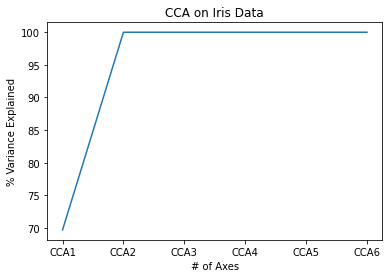

In [3]:
cca_ordination_result = cca(explanatory_matrix, response_matrix.loc[:, response_matrix.columns != 'group'])
cca_var = np.cumsum(np.round(cca_ordination_result.proportion_explained, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Axes')
plt.title('CCA on Iris Data')
plt.plot(cca_var)

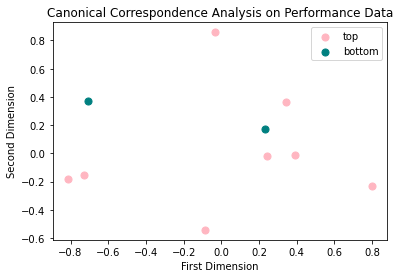

In [4]:
cca_ordination_df = pd.DataFrame(cca_ordination_result.samples) # pulling the observation locations in space
cca_ordination_df_plot = pd.concat([cca_ordination_df, response_matrix[["group"]]], axis = 1)

# creating the ordination plot
groups = list(response_matrix.group.unique())
colors = ['lightpink', 'teal']
plt.figure()
for target, color in zip(groups,colors):
    indicesToKeep = response_matrix['group'] == target
    plt.scatter(cca_ordination_df_plot.loc[indicesToKeep, 'CCA1']
               , cca_ordination_df_plot.loc[indicesToKeep, 'CCA2']
               , c = color
               , s = 50, label = target)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Canonical Correspondence Analysis on Performance Data') 
plt.legend()
plt.show()

### Redundancy Analysis 

Assuming that I want to constrain my response variables by my explanatory variables, and I believe that relationships between the response variables and explanatory variables are linear, I would use a Redundancy Analysis. Note, RDA is an eigenanalyses, like CCA.

**Use RA when you would like to visualize what one matrix will look like if it was constrained by another, and you think that there is a linear relationship between both matrices.**

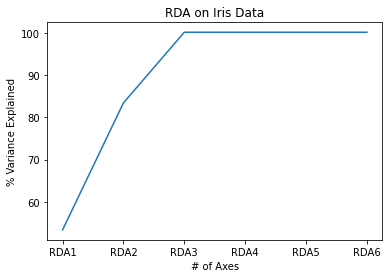

In [5]:
rda_ordination_result = rda(explanatory_matrix, response_matrix.loc[:, response_matrix.columns != 'group'])
rda_var=np.cumsum(np.round(rda_ordination_result.proportion_explained, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Axes')
plt.title('RDA on Iris Data')
plt.plot(rda_var)

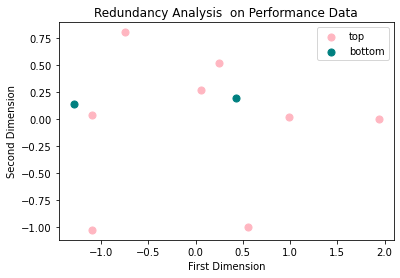

In [6]:
rda_ordination_df = pd.DataFrame(rda_ordination_result.samples) # pulling the observation locations in space
rda_ordination_df_plot = pd.concat([rda_ordination_df, response_matrix[["group"]]], axis = 1) # pulling scores and site grouping for plotting

# creating ordination plot
groups = list(response_matrix.group.unique())
colors = ['lightpink', 'teal']
plt.figure()
for target, color in zip(groups,colors):
    indicesToKeep = response_matrix['group'] == target
    plt.scatter(rda_ordination_df_plot.loc[indicesToKeep, 'RDA1']
               , rda_ordination_df_plot.loc[indicesToKeep, 'RDA2']
               , c = color
               , s = 50, label = target)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Redundancy Analysis  on Performance Data') 
plt.legend()
plt.show()

## Free Ordinations

### Non-metric Multidimensional Scaling 

Non-metric multidimensional scaling is an ordination method – graphical technique to summarize complex multivariate data, where only a few, dominate trends are extracted from an array of patterns.  NMDS, does not assume multivariate linearity or normality, is not skewed by data sets with numerous zeroes or are measured across different scales, and can use distance matrixes
created from any of the many methods. Also, NMDS can accommodate zero-dominated data, and data measured on different scales by using the rank distances of the observations. The steps in a NMDS include:
1. Create a dissimilarity matrix; 
2. Use a random or assigned starting location to find an optimal, new position that lowers the variance among variables; 
3. Normalize by subtracting from the axis means;
4. Calculate Euclidean distance; 
5. Use distances to rank observations and sort them by their rank; 
6. Estimate stress, standardize stress, minimize stress by changing the location of observations; 
7. repeat from step 2 until the stress estimates are stable.

We can use a wide range of dissimilarity matricies: ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule (based on scipy.spatial.distance.pdist). But, the default is Euclidean.

Typically, we would need to know what the optimal number of axes are. We find this by running the NMDS many times, changing the number of axes from 1 to 10 (typically). We look for where there is an **elbow** in stress as indicative as the optimal number of axes. Note, the first axes is not always indicative of the one explaining the most variation in our data.

![Ordinations](figures/Slide2.PNG)
**Use NMDS when you think your variables have a mix of patterns (e.g., linear, unimodal), and the relationships between variables in your data are best summarised using a distance measure vs correlation. Thus, we use this as a non-parametric option.**

In [ ]:
# going to use a dataset that will better elucidate patterns vs what I created above for the guided ordinations
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
response_matrix_iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
response_matrix_iris_x = response_matrix_iris.loc[:, features].values
# Separating out the target
response_matrix_iris_y = response_matrix_iris.loc[:,['target']].values

# we can use a wide range of distance measures from the sklearn library
dis_matrix = pairwise_distances(response_matrix_iris_x, metric = 'braycurtis') # we use braycurtis when we think that zeroes should have lower weights than non-zeroes
# however, I will stick with euclidean
nmds_parameters = manifold.MDS(n_components = 2,metric = False, random_state = 123, 
                               dissimilarity='euclidean')# precomputed if plan to use the braycurtis matrix created above
nmds_response_scores = nmds_parameters.fit_transform(response_matrix_iris_x) # locations of observations in space

# preparing to plot the first 2 axes
nmds_ordination_df = pd.DataFrame(data = nmds_response_scores, columns = ['nmds 1', 'nmds 2'])
nmds_ordination_df_plot = pd.concat([nmds_ordination_df, response_matrix_iris[['target']]], axis = 1)
                      
# creating ordination plot                      
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['lightpink', 'indigo', 'teal']
plt.figure()
for target, color in zip(targets,colors):
    indicesToKeep = response_matrix_iris['target'] == target
    plt.scatter(nmds_ordination_df_plot.loc[indicesToKeep, 'nmds 1']
               , nmds_ordination_df_plot.loc[indicesToKeep, 'nmds 2']
               , c = color
               , s = 50, label= target)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Non-metric Multidimensional Scaling on Iris Data')  
plt.legend()
plt.show()

## Metric Multidimensional Scaling
There is one main difference between the metric and to non-metric implementations - the metric implementation tries to replicate the original distances between observations as represented in the dissimilarity matrix that was originally put in. Thus, if in the dissimilarity matrix, observation 35 and 37 were clustered to the left (in space), the MDS will also have these points clustered to the left (in space). The NMDS will only consider how observations are ranked, the distances are not considered.

**Use MDS when you think the there is a linear pattern in your data, and the distance between observations is meaningful and not just how they are ranked. You should also consider this method of when our data is best summarised using a distance measure vs correlation**

In [ ]:
# same syntax as above, but we will use metric = True to get the MDS
nmds_parameters = manifold.MDS(n_components = 2,metric = True, random_state = 123, 
                               dissimilarity='euclidean')# precomputed if plan to use the braycurtis matrix created above
nmds_response_scores = nmds_parameters.fit_transform(response_matrix_iris_x) # locations of observations in space

# preparing to plot the first 2 axes
nmds_ordination_df = pd.DataFrame(data = nmds_response_scores, columns = ['nmds 1', 'nmds 2'])
nmds_ordination_df_plot = pd.concat([nmds_ordination_df, response_matrix_iris[['target']]], axis = 1)
                      
# creating ordination plot                      
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['lightpink', 'indigo', 'teal']
plt.figure()
for target, color in zip(targets,colors):
    indicesToKeep = response_matrix_iris['target'] == target
    plt.scatter(nmds_ordination_df_plot.loc[indicesToKeep, 'nmds 1']
               , nmds_ordination_df_plot.loc[indicesToKeep, 'nmds 2']
               , c = color
               , s = 50, label= target)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Metric Multidimensional Scaling on Iris Data')  
plt.legend()
plt.show()

### Principal Components Analysis 

This is a rigid rotation of the response or explanatory matrix, such that observations are projected onto a new set of axes. Unlike with CCA and RDA, we are simply trying to find a linear combination of the most important variables (from either an response or explanatory matrix) that best explains the variance in the data. Thus, we typically use this Ordination method is a feature reduction tool.


**Use PCA when you think there is a linear pattern in your data, and the relationships between variables in your data are best summarised using correlation vs a distance measure. We expect similar results from PCAs and MDSs, apart from when the distance is a better way to describe how observations are related.**

In [ ]:
# Standardizing the features

# it is always best to scale the data before doing a PCA
response_matrix_iris_x_transformed = StandardScaler().fit_transform(response_matrix_iris_x)

# you can decide how many axes you want
pca_parameters = PCA(n_components=4)
# always used the scaled data here
pca_ordination_result = pca_parameters.fit_transform(response_matrix_iris_x_transformed)

# creating ordination plot
pca_ordination_df = pd.DataFrame(data = pca_ordination_result
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pca_ordination_df_plot = pd.concat([pca_ordination_df, response_matrix_iris[['target']]], axis = 1)
target = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['lightpink', 'indigo', 'teal']

pca_vectors = np.transpose(pca_parameters.components_[0:2, :])
pca_n = pca_vectors.shape[0]

for target, color in zip(target,colors):
    indicesToKeep = response_matrix_iris['target'] == target
    plt.scatter(pca_ordination_df_plot.loc[indicesToKeep, 'pc 1']
               , pca_ordination_df_plot.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50, label= target)
for i in range(pca_n):
    plt.arrow(0, 0, pca_vectors[i,0]*2, pca_vectors[i,1]*2,color = 'black',alpha = 0.5)
    plt.text(pca_vectors[i,0]* 2, pca_vectors[i,1] * 2, features[i],
                 color = 'grey', ha = 'center', va = 'center')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Principal Components Analysis on Iris Data')  
plt.legend()
plt.show()

In [ ]:
pca_parameters.fit(response_matrix_iris_x_transformed) # now we can see how much variance was explained on the axes
pca_variance = pca_parameters.explained_variance_ratio_ #calculate variance ratios

pca_var=np.cumsum(np.round(pca_parameters.explained_variance_ratio_, decimals=3)*100) 

plt.ylabel('% Variance Explained')
plt.xlabel('# of Axes')
plt.title('PCA on Iris Data')
plt.plot(pca_var)

### Correspondence Analyses

Like PCA, this is an eigenanalysis; but, we assume a unimodal distribution of our response/explanatory variables. This was popularly used in ecology because we often see this unimodal shape in species abundances. 

**Use CA/RA when you think there is a unimodal pattern in your data, and the relationships between variables in your data are best summarised using correlation vs a distance measure.**

In [ ]:
ca_ordination_result = ca(response_matrix_iris.loc[:, response_matrix_iris.columns != 'target'])
ca_var=np.cumsum(np.round(ca_ordination_result.proportion_explained, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Axes')
plt.title('CA on Iris Data')
plt.plot(ca_var)

In [ ]:
ca_ordination_df = pd.DataFrame(ca_ordination_result.samples) # locations of observations in space

# preparing to the ordination
ca_ordination_df_plot = pd.concat([ca_ordination_df, response_matrix_iris[['target']]], axis = 1)
                      
ca_vectors = np.array(ca_ordination_result.features[['CA1', 'CA2']])
ca_n = ca_vectors.shape[0]
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['lightpink', 'indigo', 'teal']

# creating ordination plot
plt.figure()
for target, color in zip(targets,colors):
    indicesToKeep = response_matrix_iris['target'] == target
    plt.scatter(ca_ordination_df_plot.loc[indicesToKeep, 'CA1']
               , ca_ordination_df_plot.loc[indicesToKeep, 'CA2']
               , c = color
               , s = 50, label = target)
for i in range(ca_n):
    plt.arrow(0, 0, ca_vectors[i,0]*0.04, ca_vectors[i,1]*0.04,color = 'black',alpha = 0.5)
    plt.text(ca_vectors[i,0]*0.05, ca_vectors[i,1]*0.05, features[i],
                 color = 'grey', ha = 'center', va = 'center')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Correspondence Analysis on Iris Data')    
plt.legend()
plt.show()

### Detrended Correspondence Analysis 

Because CA/RA can distort one-dimensional gradients into an arch on the second analysis, observations that exist on the end points of the gradient become more compressed. Detrended Correspondence Analysis (DCA) was developed to overcome these problems by flattening the arch and rescaling the positions of observations along an axis. Simulations showed that DCA
performed markedly better than CA/RA and PCA.

**Use DCA when you think there is a unimodal pattern in your data, and the relationships between variables in your data are best summarised using correlation vs a distance measure.**

There's a library that we can use for the DCA, but it does not seem to have an implementation in windows (which is what I currently use). Read more about [**cornpy**](https://pypi.org/project/cornpy/), if you would like to try this yourself. 